# **Herramientas de Análisis**

---
---

<!-- script html for image -->

<center>


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/ac/Sw-ep1-logo.svg/1280px-Sw-ep1-logo.svg.png"  width="500" height="150"/>


<br>

Fuente de la imagen: [https://es.wikipedia.org](https://es.wikipedia.org/wiki/Star_Wars:_Episodio_I_-_La_amenaza_fantasma)

</center>

<br>

# NOMBRE: Elizabeth Evelin Peredo Mescco

# **Índice**

---
---

> [Herramientas de Análisis](#scrollTo=tW3jK_BDgjno&line=20&uniqifier=1)
<br>
>>
>> [Preparación del Entorno](#scrollTo=5zZfGqOugjnr&line=3&uniqifier=1) \\
>>   \\
>> [Ejercicio 2](#scrollTo=EljLebnxgjqM) \\

# Preparación del entorno

Padawan! Cuando inicies sesión en Colab, prepara el entorno ejecutando el siguiente código.

In [18]:
if 'google.colab' in str(get_ipython()):
    !git clone https://github.com/griu/mbdds_fc20.git /content/mbdds_fc20
    !git -C /content/mbdds_fc20 pull
    %cd /content/mbdds_fc20/Python
    !python -m pip install -r requirementsColab.txt

fatal: destination path '/content/mbdds_fc20' already exists and is not an empty directory.
Already up to date.
/content/mbdds_fc20/Python
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Ejercicio 2

Para el ejercicio 2, añadimos los datos del ejercicio 1 los datos de planetas.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # para el estilo de graficos
import datetime
import locale
#from pyspark.sql import functions as F

entidades = ['planets','starships','vehicles','people','species']
entidades_df = {x: pd.read_pickle('www/' + x + '_df.pkl') for x in entidades}

# Datos people
people_df = entidades_df['people'][["height","mass","birth_year","gender","homeworld"]].dropna()

# planetas
planets_df = entidades_df['planets'][["orbital_period","url"]].dropna()
planets_df.head()

,orbital_period,url
name,,
Tatooine,304.0,http://swapi.dev/api/planets/1/
Alderaan,364.0,http://swapi.dev/api/planets/2/
Yavin IV,4818.0,http://swapi.dev/api/planets/3/
Hoth,549.0,http://swapi.dev/api/planets/4/
Dagobah,341.0,http://swapi.dev/api/planets/5/


## Ejercicio 2.1.

Construye una función que diga "buenos días", "buenas tardes" o "buenas noches" en función de la hora del día.

> Truco 1: Para testear la función haz que tenga un parametro de entrada que tenga como valor por defecto: `datetime.now()` (primero carga `from datetime import datetime`).

> Truco 2: Puedes extraer la hora de un datetime con `.hour`.

In [20]:
# Solución:
def saludo():
    hora=(datetime.datetime.now()).strftime("%H:%M:%S")
    #hora="06:00:00"
    #hora="13:00:00"
    if hora<"12:00:00":
      saludar="Buenos días"
    elif  hora<"17:00:00":
      saludar="Buenas tardes"
    else:
      saludar="Buenas noches"
    return saludar

saludo()


'Buenas tardes'

## Ejercicio 2.2.

En el data frame personajes_df, calcula de nuevo el IMC y crea una nueva variable con el trameado de la variable IMC definido en la siguiente tabla:

 | Categoría de nivel de peso | Intervalo del percentil |
 | -------------------------- | ----------------------- | 
 | Bajo peso | < 18.5 |
 | Normal | >= 18.5 y < 25 |
 | Sobrepeso | >= 25 y <30 |
 | Obeso | >= 30 |

> Truco: utiliza `pd.cut(..., right=False)` y modifica las etiquetas con `.cat.categories`.  

In [21]:
# Solución:
personajes_df = people_df.copy()
personajes_df["IMC"]=people_df["mass"]/(people_df["height"]/100)**2

personajes_df["peso_cat"]=pd.cut(x=personajes_df["IMC"],
                                  bins=[0,18.5, 25, 30,np.infty],
                                  labels=["Bajo peso", "Normal", "Sobrepeso","Obeso"])

personajes_df.head()

,height,mass,birth_year,gender,homeworld,IMC,peso_cat
name,,,,,,,
Luke Skywalker,172.0,77.0,19.0,male,http://swapi.dev/api/planets/1/,26.027582,Sobrepeso
C-3PO,167.0,75.0,112.0,none,http://swapi.dev/api/planets/1/,26.892323,Sobrepeso
R2-D2,96.0,32.0,33.0,none,http://swapi.dev/api/planets/8/,34.722222,Obeso
Darth Vader,202.0,136.0,41.9,male,http://swapi.dev/api/planets/1/,33.330066,Obeso
Leia Organa,150.0,49.0,19.0,female,http://swapi.dev/api/planets/2/,21.777778,Normal


## Ejercicio 2.3.

Muestra las frecuencias de la nueva variable definida en 2.2.

In [22]:
# Solución:
df3=personajes_df.groupby(['peso_cat'],as_index=False).size()
df3.head()

,peso_cat,size
0,Bajo peso,4
1,Normal,14
2,Sobrepeso,11
3,Obeso,7


## Ejercicio 2.4.

Calcula ahora un trameado de la edad en 5 grupos equiprobables.

Muestra los recuentos (frecuencias) de la nueva obtenida por pantalla.

> Truco: Busca ayuda de la función [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)

In [23]:
# Solución:
personajes_df["rango_edad"] = pd.qcut(
    personajes_df["birth_year"],5)

# FORMA 1
df4_1=personajes_df["rango_edad"].value_counts().sort_index()

# FORMA 2
df4_2=personajes_df.groupby(['rango_edad'],as_index=False).size()

df4_2.head()

,rango_edad,size
0,"(7.999, 29.0]",8
1,"(29.0, 41.9]",8
2,"(41.9, 52.0]",6
3,"(52.0, 82.0]",7
4,"(82.0, 896.0]",7


## Ejercicio 2.5.

Presenta la tabla cruzada de tramos de edad (ej. 2.4) por tramos de IMC (ej. 2.2). 

¿Qué tramo de edad tiene un mayor número de personajes con Bajo peso?

In [24]:
# Solución:
df5=pd.crosstab(personajes_df.peso_cat,
                   personajes_df.rango_edad, 
                   margins=True)
print(df5)

""" 
Los personajes que tienen entre 41.9 y 52 
son los que tienen mayor cantidad de personas
con bajo peso
"""

rango_edad  (7.999, 29.0]  (29.0, 41.9]  (41.9, 52.0]  (52.0, 82.0]  \
peso_cat                                                              
Bajo peso               0             1             3             0   
Normal                  3             2             1             4   
Sobrepeso               4             3             1             2   
Obeso                   1             2             1             1   
All                     8             8             6             7   

rango_edad  (82.0, 896.0]  All  
peso_cat                        
Bajo peso               0    4  
Normal                  4   14  
Sobrepeso               1   11  
Obeso                   2    7  
All                     7   36  


' \nLos personajes que tienen entre 41.9 y 52 \nson los que tienen mayor cantidad de personas\ncon bajo peso\n'

## Ejercicio 2.6.

Calcula una tabla resumen (data frame) donde se presente la media del IMC en cada tramo de edad calculado en ejercicio 2.4.

Presenta por pantalla la nueva tabla resumen.


In [25]:
# Solución:
df6=personajes_df.groupby(
    'rango_edad', as_index=False).agg(
        {"IMC": "mean","birth_year":"median"})
    
df6.head()

,rango_edad,IMC,birth_year
0,"(7.999, 29.0]",25.960538,20.0
1,"(29.0, 41.9]",26.242997,38.5
2,"(41.9, 52.0]",22.972490,47.5
3,"(52.0, 82.0]",24.774935,58.0
4,"(82.0, 896.0]",85.311313,112.0


## Ejercicio 2.7.

Presenta los datos del ej. 2.6. como un gráfico de líneas donde el eje x sea la edad y el eje y el IMC medio.

> Truco: Como eje x del gráfico de líneas, puedes calcular en 2.6., en el mismo cálculo del IMC medio, la mediana de edad de cada tramo de edad.

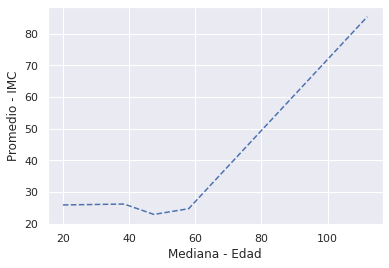

In [26]:
# Solución:
palette = sns.color_palette("mako_r", 6)

fig=sns.lineplot(data=df6,
             x='birth_year',
             y='IMC')

fig.set(xlabel="Mediana - Edad",ylabel="Promedio - IMC")
fig.lines[0].set_linestyle("--")
plt.show()


## Ejercicio 2.8.

Calcula el ratio del IMC sobre la mediana del IMC de su tramo de edad (definidos en el ejercicio 2.2.) mediante la función groupby(...).apply(...).

> truco: primero crea una función que devuelva:  `x / np.nanmedian(x)`.

Presenta los datos mediante un boxplot de la nueva variable: [pd.boxplot()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html). 

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


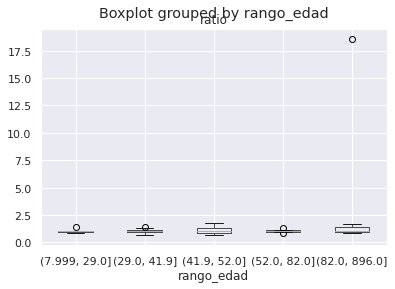

In [27]:
# Solución:
df_8 = personajes_df.groupby("rango_edad")\
.apply(lambda x:x["IMC"]/np.nanmedian(x["IMC"])).to_frame('ratio')

df_8.boxplot(column= "ratio", by= "rango_edad")
plt.show()

## Ejercicio 2.9.

¿Cual es planeta con un menor índice IMC medio de sus personajes?
¿Que personaje/s son de ese planeta?

In [28]:
# Solución:
people_df1=people_df.reset_index(drop=False)
planets_df1=planets_df.reset_index(drop=False)

df_9=pd.merge(people_df1[['name','height','mass','homeworld']],
              planets_df1[['name','url']],
              how='left',
              left_on=['homeworld'],
              right_on=['url'])

df_9['IMC']=people_df1['mass']/(people_df1['height']/100)**2

df_9_1=df_9.groupby(
    'name_y', as_index=False).agg(
        {"IMC": "mean","name_x":"count"}).sort_values(['IMC'],ascending=True)
        
print(df_9_1)



        name_y         IMC  name_x
14      Ryloth   17.358919       1
2        Cerea   20.916233       1
9     Kashyyyk   21.545091       1
0     Alderaan   21.777778       1
5        Dorin   22.634676       1
11       Naboo   22.750601       4
8       Kamino   23.350951       1
7   Haruun Kal   23.766410       1
13       Rodia   24.725183       1
15     Socorro   25.216253       1
10    Mon Cala   25.617284       1
3     Corellia   25.667478       2
1       Bespin   25.795918       1
6        Endor   25.826446       1
4     Dathomir   26.122449       1
16    Tatooine   28.645923       7
17   Trandosha   31.301939       1
18     unknown   32.639963       3
12   Nal Hutta  443.428571       1


In [29]:
print(df_9[(df_9.name_y=="Ryloth")])

         name_x  height  mass                         homeworld  name_y  \
28  Ayla Secura   178.0  55.0  http://swapi.dev/api/planets/37/  Ryloth   

                                 url        IMC  
28  http://swapi.dev/api/planets/37/  17.358919  


El planeta con menor indice es Ryloth con una media de IMC de 17.36 y el personaje es Ayla Secura

## Ejercicio 2.10.

Convierte a datetime los siguientes strings con la función [datetime.strptime()](https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior) (consulta la ayuda si es necesario) de la libreria datetime:

- "1 january, 2020"
- "15-feb.-2017"
- "20190701 22:30"  # 1 de julio de 2019



In [30]:
# Solución:
date1 = datetime.datetime.strptime("1 january, 2020","%d %B, %Y")
print("1:",date1)

date2 = datetime.datetime.strptime("15-feb.-2017","%d-%b.-%Y")
print("2:",date2)

date3 = datetime.datetime.strptime("20190701 22:30", "%Y%m%d %H:%M")
print("3:",date3)

1: 2020-01-01 00:00:00
2: 2017-02-15 00:00:00
3: 2019-07-01 22:30:00
